In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

In [2]:
def compute_pos(xticks, width, i, models):
    index = np.arange(len(xticks))
    n = len(models)
    correction = i-0.5*(n-1)
    return index + width*correction

def present_height(ax, bar):
    for rect in bar:
        height = rect.get_height()
        posx = rect.get_x()+rect.get_width()*0.5
        posy = height*1.01
        ax.text(posx, posy, '%.4f' % height, rotation=90, ha='center', va='bottom', fontsize=15)

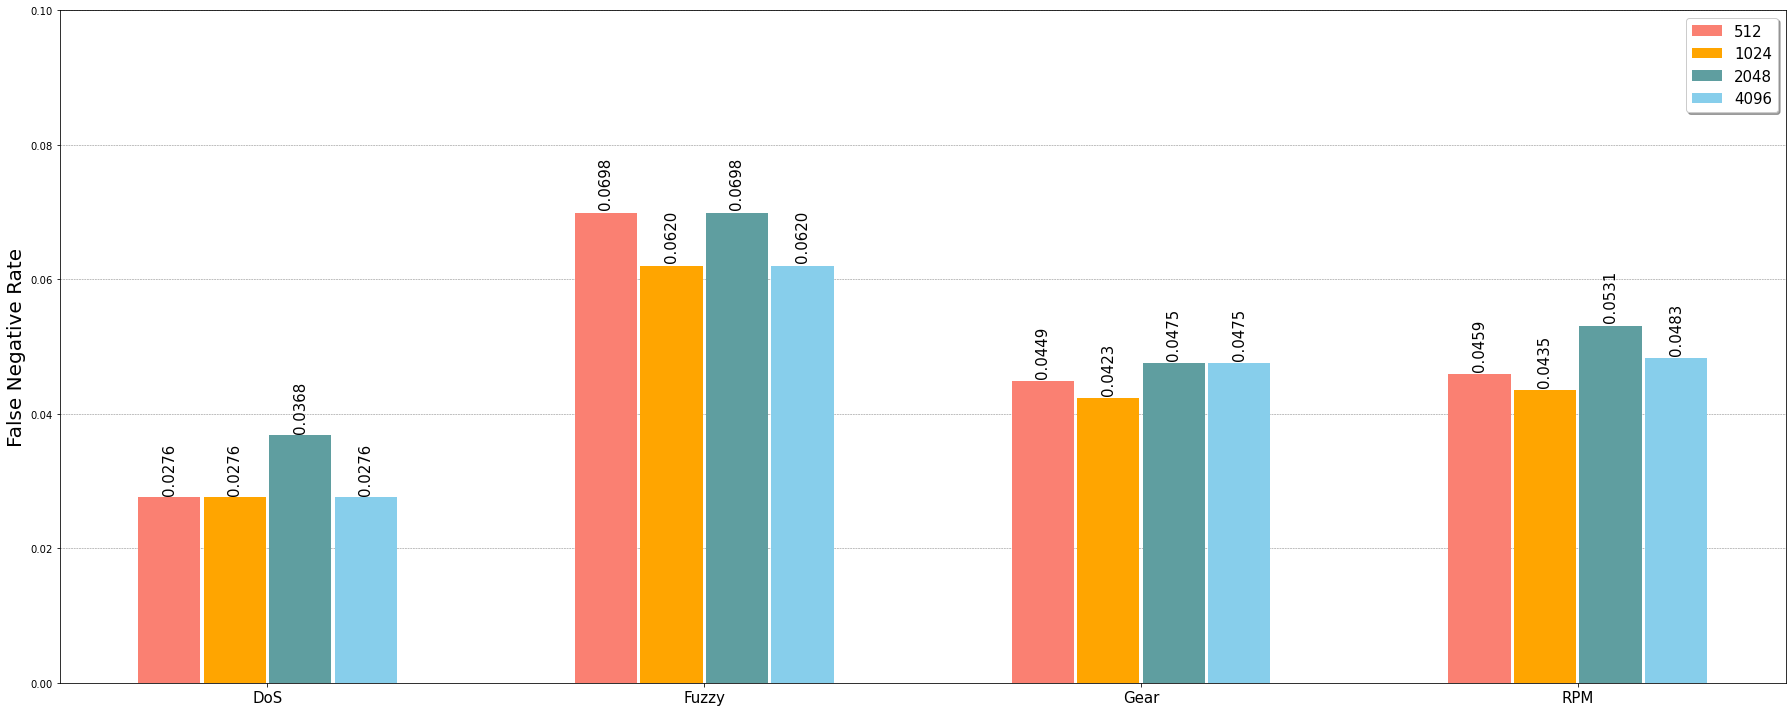

In [10]:
%matplotlib inline
xticks = ['DoS', 'Fuzzy', 'Gear', 'RPM']
fig, ax = plt.subplots(1,1,figsize=(25,10))
colors = ['salmon', 'orange', 'cadetblue', 'skyblue', 'plum']
width = 0.15
data = {
    '512': [ 0.0276, 0.0698, 0.0449, 0.0459],
    '1024': [ 0.0276, 0.0620, 0.0423, 0.0435],
    '2048': [ 0.0368, 0.0698, 0.0475, 0.0531],
    '4096': [ 0.0276, 0.0620, 0.0475, 0.0483] 
}
for i, model in enumerate(data.keys()):
    pos = compute_pos(xticks, width, i, data.keys())
    bar = ax.bar(pos, data[model], width=width*0.95, label=model, color=colors[i])
    present_height(ax, bar)
    
ax.set_xticks(np.arange(len(xticks)))
ax.set_xticklabels(xticks, fontsize=15)	
# ax.set_xlabel('Embedding dimension', fontsize=20)

plt.ylim(ymax=0.1)
ax.set_ylabel('False Negative Rate', fontsize=20)
ax.legend(loc='upper right', shadow=True, ncol=1, fontsize=15)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)
plt.tight_layout()